In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [3]:
pro_2016 = pd.read_csv('/Users/ming/Downloads/all/properties_2016.csv')
pro_2017 = pd.read_csv('/Users/ming/Downloads/all/properties_2017.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
#check the % of NaN
pro_2016.isnull().sum()/len(pro_2016)*100 

parcelid                         0.000000
airconditioningtypeid           72.815410
architecturalstyletypeid        99.796966
basementsqft                    99.945465
bathroomcnt                      0.383959
bedroomcnt                       0.383557
buildingclasstypeid             99.576949
buildingqualitytypeid           35.063749
calculatedbathnbr                4.318346
decktypeid                      99.427311
finishedfloor1squarefeet        93.209304
calculatedfinishedsquarefeet     1.861339
finishedsquarefeet12             9.246664
finishedsquarefeet13            99.743000
finishedsquarefeet15            93.608572
finishedsquarefeet50            93.209304
finishedsquarefeet6             99.263002
fips                             0.383121
fireplacecnt                    89.527160
fullbathcnt                      4.318346
garagecarcnt                    70.411967
garagetotalsqft                 70.411967
hashottuborspa                  97.688141
heatingorsystemtypeid           39

In [13]:
num_of_col = pro_2016.count(1).max()

col_index = []

for num in range(num_of_col):
    if (pro_2016.isnull().sum()/len(pro_2016)*100 > 50)[num] == False:
        col_index.append(num)


In [14]:
col_index

[0, 4, 5, 7, 8, 11, 12, 17, 19, 23, 24, 25, 26, 32, 33, 34, 35, 36, 37, 39]

In [15]:
pro_2016.iloc[:, col_index].head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidzip
0,10754147,0.0,0.0,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,34144442.0,-118654084.0,85768.0,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,96337.0
1,10759547,0.0,0.0,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,34140430.0,-118625364.0,4083.0,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,96337.0
2,10843547,0.0,0.0,NaN,NaN,73026.0,NaN,6037.0,NaN,NaN,33989359.0,-118394633.0,63085.0,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,96095.0
3,10859147,0.0,0.0,7.0,NaN,5068.0,NaN,6037.0,NaN,NaN,34148863.0,-118437206.0,7521.0,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,96424.0
4,10879947,0.0,0.0,NaN,NaN,1776.0,NaN,6037.0,NaN,NaN,34194168.0,-118385816.0,8512.0,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,96450.0


In [16]:
pro_2016.iloc[:, col_index].columns.values

array(['parcelid', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedbathnbr', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'fips', 'fullbathcnt',
       'heatingorsystemtypeid', 'latitude', 'longitude',
       'lotsizesquarefeet', 'propertycountylandusecode',
       'propertylandusetypeid', 'propertyzoningdesc',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidzip'], dtype=object)

In [19]:
transaction_2016 = pd.read_csv('/Users/ming/Downloads/all/train_2016_v2.csv')

In [20]:
transaction_2017 = pd.read_csv('/Users/ming/Downloads/all/train_2017.csv')

In [21]:
transaction_2016and2017 = pd.concat([transaction_2016, transaction_2017], axis=0)
transaction_no_redundant = transaction_2016and2017.groupby('parcelid').max()

In [22]:
#Four time points: October 2016 (201610), November 2016 (201611), December 2016 (201612), October 2017 (201710) would be predicted using the model.

train = transaction_no_redundant[~transaction_no_redundant.transactiondate.str.contains('2016-10|2016-11|2016-12|2017-10' )]
model = transaction_no_redundant[transaction_no_redundant.transactiondate.str.contains('2016-10|2016-11|2016-12|2017-10' )]


In [23]:
print('Total No. of Raw Transaction Data:', len(transaction_2016and2017))
print('No. of Transaction Data without redundant', len(transaction_no_redundant))
print('No. of Transaction Data for training:', len(train))
print('No. of Transaction Data for prediction:', len(model))

Total No. of Raw Transaction Data: 167888
No. of Transaction Data without redundant 165210
No. of Transaction Data for training: 156897
No. of Transaction Data for prediction: 8313


In [121]:
#check if any NaN value
print(sum(pd.isnull(train_2016.logerror)))
print(sum(pd.isnull(train_2017.logerror)))

0
0


In [127]:
len(pro_2016)

2985217

In [128]:
len(pro_2017)

2985217

In [31]:
train.head()

,logerror,transactiondate
parcelid,,
10711738,0.027600,2016-08-02
10711755,-0.018200,2016-08-02
10711805,-0.100900,2016-05-03
10711816,-0.012100,2016-04-05
10711855,-0.007357,2017-07-07


In [32]:
result = pd.merge(train, pro_2017.iloc[:, col_index], on='parcelid', how='inner')

In [33]:
result.head()

,parcelid,logerror,transactiondate,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,...,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidzip
0,10711738,0.027600,2016-08-02,3.0,4.0,8.0,3.0,2538.0,2538.0,6037.0,...,34220381.0,-118620802.0,11012.0,0101,261.0,LARE11,6.037113e+07,12447.0,3101.0,96339.0
1,10711755,-0.018200,2016-08-02,3.0,3.0,8.0,3.0,1589.0,1589.0,6037.0,...,34222040.0,-118622240.0,11010.0,0101,261.0,LARE11,6.037113e+07,12447.0,3101.0,96339.0
2,10711805,-0.100900,2016-05-03,2.0,3.0,8.0,2.0,2411.0,2411.0,6037.0,...,34220427.0,-118618549.0,11723.0,0101,261.0,LARE9,6.037113e+07,12447.0,3101.0,96339.0
3,10711816,-0.012100,2016-04-05,2.0,4.0,8.0,2.0,2232.0,2232.0,6037.0,...,34222390.0,-118618631.0,9002.0,0100,261.0,LARE9,6.037113e+07,12447.0,3101.0,96339.0
4,10711855,-0.007357,2017-07-07,2.0,3.0,8.0,2.0,2107.0,2107.0,6037.0,...,34222559.0,-118617387.0,9158.0,0101,261.0,LARE9,6.037113e+07,12447.0,3101.0,96339.0


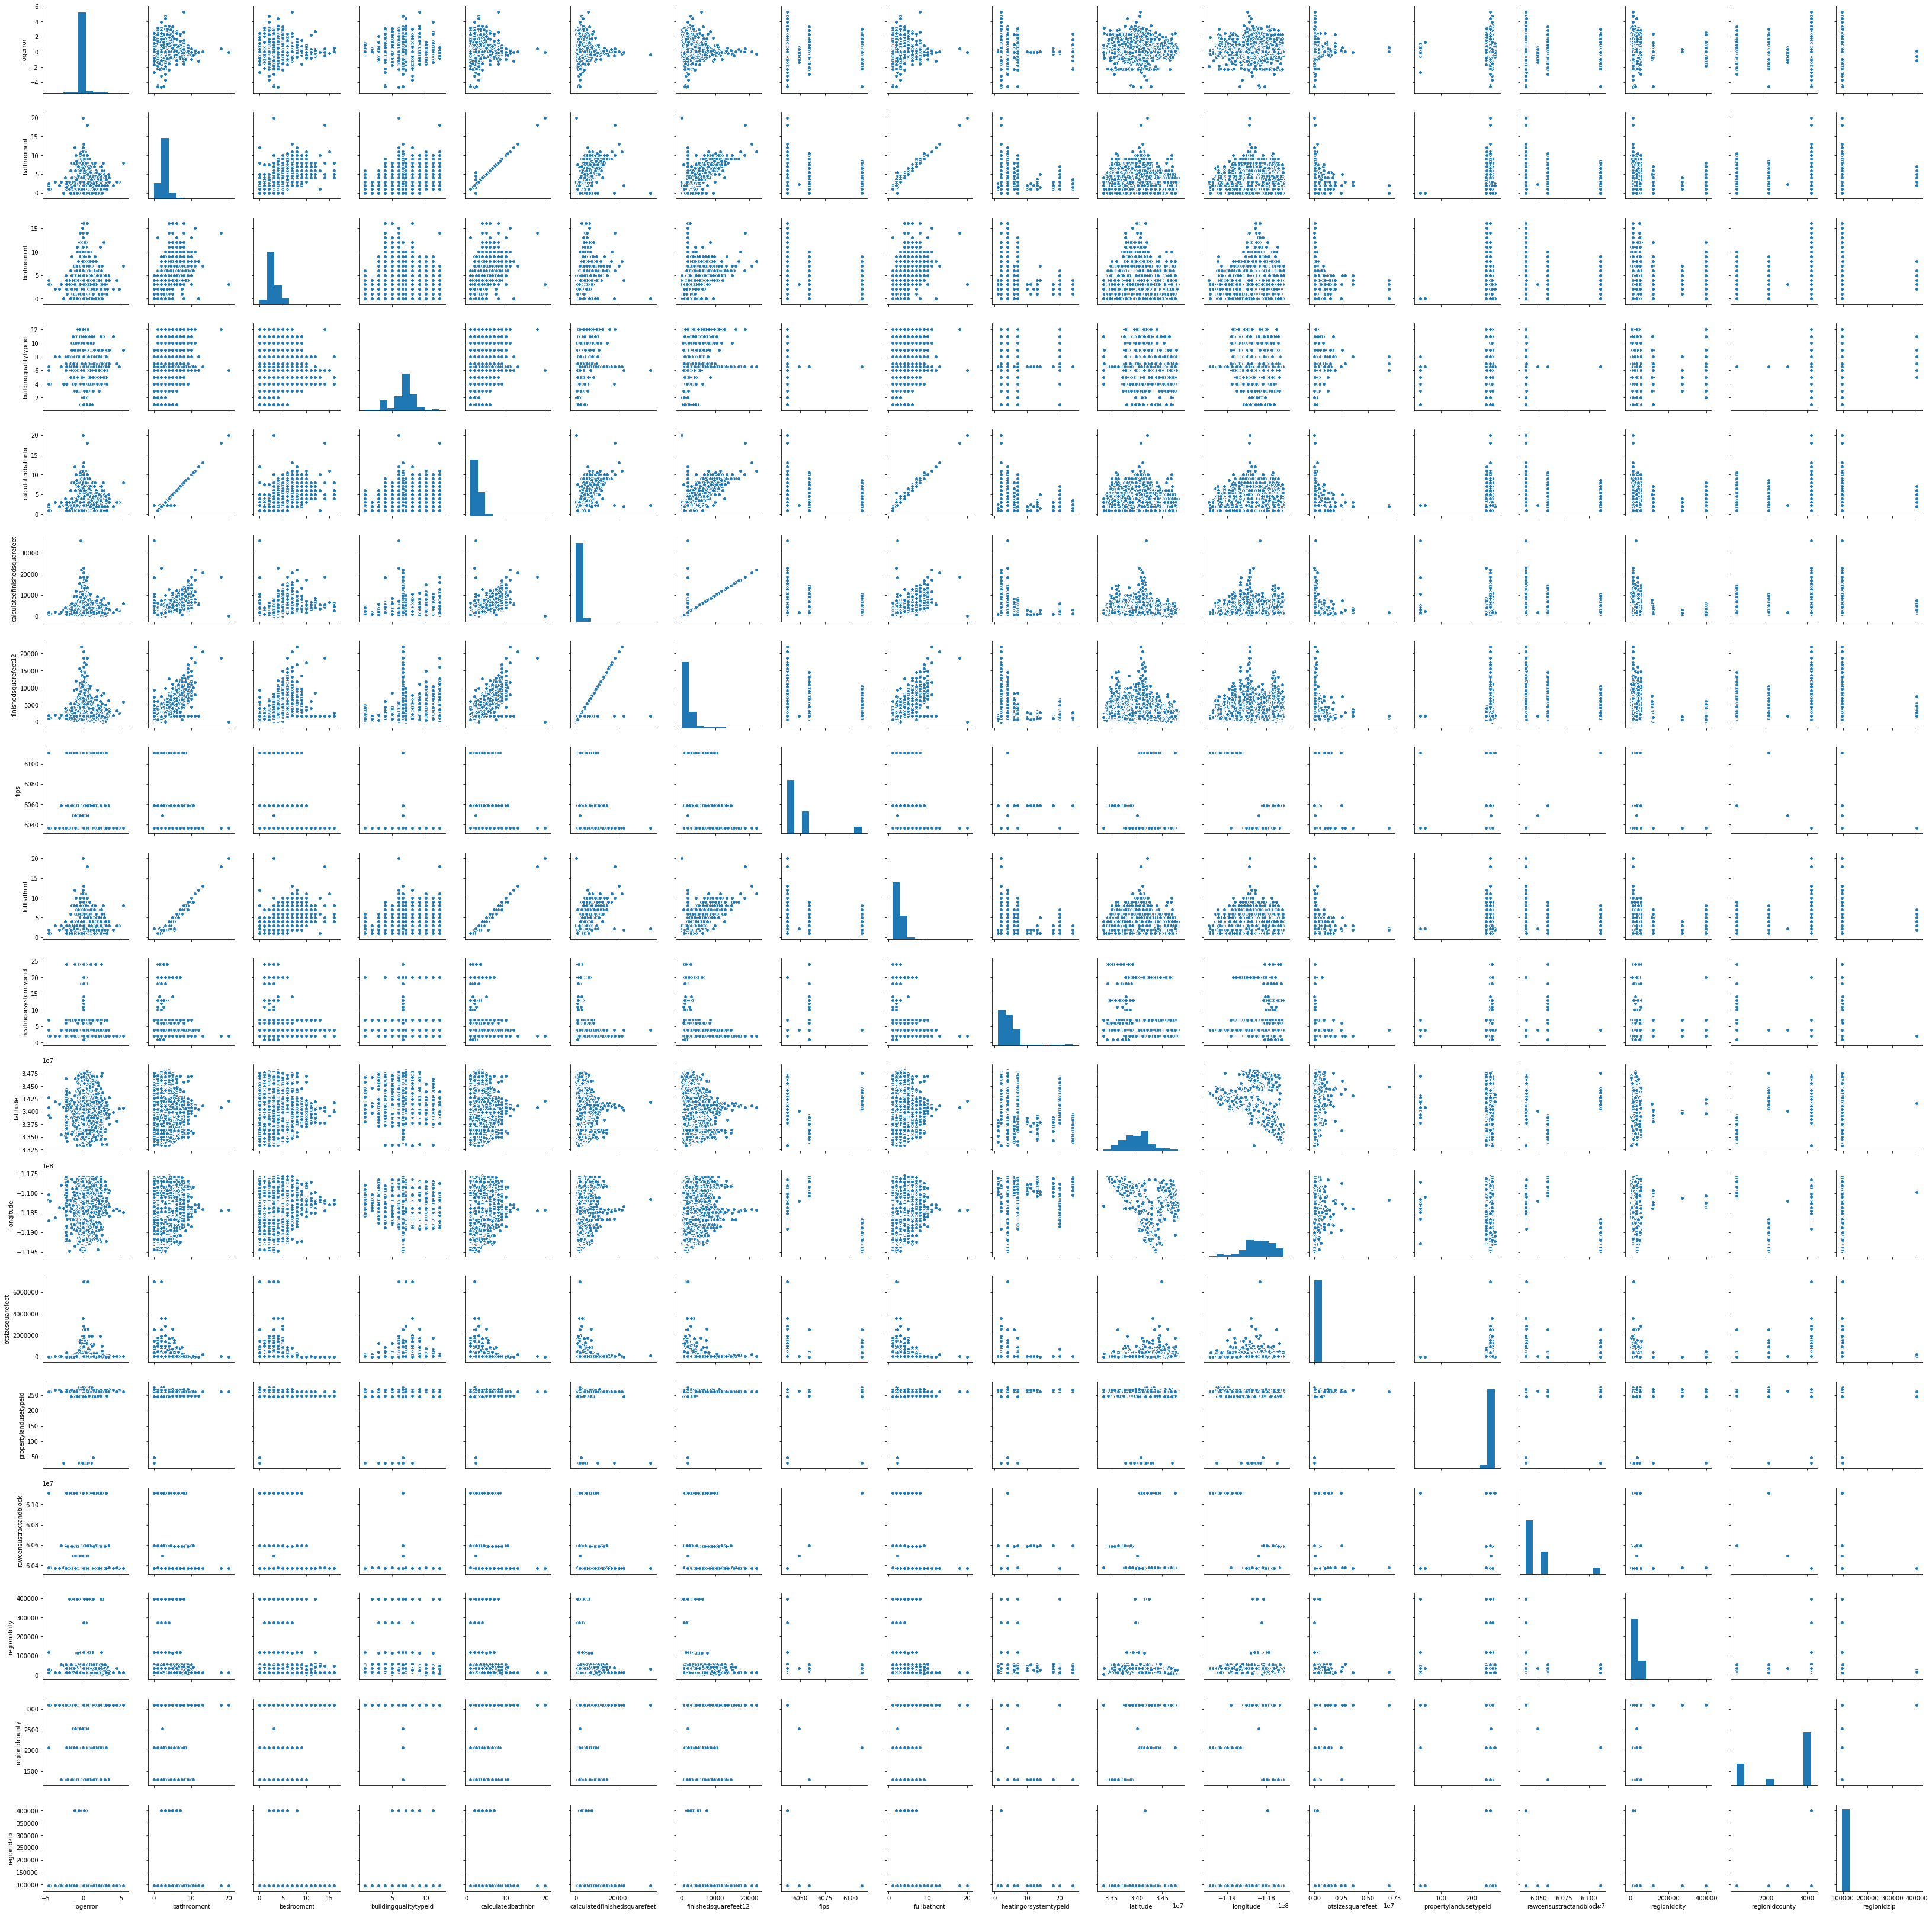

In [37]:
data=result.drop(['parcelid','transactiondate', 'propertyzoningdesc'], axis=1)
data_nonull=data.fillna(data.mean())
sns.pairplot(data_nonull)  

In [38]:
data_nonull.head()

,logerror,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip
0,0.027600,3.0,4.0,8.0,3.0,2538.0,2538.0,6037.0,3.0,2.0,34220381.0,-118620802.0,11012.0,0101,261.0,6.037113e+07,12447.0,3101.0,96339.0
1,-0.018200,3.0,3.0,8.0,3.0,1589.0,1589.0,6037.0,3.0,2.0,34222040.0,-118622240.0,11010.0,0101,261.0,6.037113e+07,12447.0,3101.0,96339.0
2,-0.100900,2.0,3.0,8.0,2.0,2411.0,2411.0,6037.0,2.0,2.0,34220427.0,-118618549.0,11723.0,0101,261.0,6.037113e+07,12447.0,3101.0,96339.0
3,-0.012100,2.0,4.0,8.0,2.0,2232.0,2232.0,6037.0,2.0,2.0,34222390.0,-118618631.0,9002.0,0100,261.0,6.037113e+07,12447.0,3101.0,96339.0
4,-0.007357,2.0,3.0,8.0,2.0,2107.0,2107.0,6037.0,2.0,2.0,34222559.0,-118617387.0,9158.0,0101,261.0,6.037113e+07,12447.0,3101.0,96339.0


In [48]:
import sklearn
from sklearn.linear_model import LinearRegression
X = data_nonull.drop(['logerror','latitude', 'longitude','propertycountylandusecode','propertylandusetypeid','regionidcity', 'regionidcounty','regionidzip'], axis = 1)
print(X.head())

# This creates a LinearRegression object
lm = LinearRegression()
lm.fit(X, data_nonull.logerror)
print(pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_}))
print('R-squared value is: ', lm.score(X, data_nonull.logerror))

   bathroomcnt  bedroomcnt  buildingqualitytypeid  calculatedbathnbr  \
0          3.0         4.0                    8.0                3.0   
1          3.0         3.0                    8.0                3.0   
2          2.0         3.0                    8.0                2.0   
3          2.0         4.0                    8.0                2.0   
4          2.0         3.0                    8.0                2.0   

   calculatedfinishedsquarefeet  finishedsquarefeet12    fips  fullbathcnt  \
0                        2538.0                2538.0  6037.0          3.0   
1                        1589.0                1589.0  6037.0          3.0   
2                        2411.0                2411.0  6037.0          2.0   
3                        2232.0                2232.0  6037.0          2.0   
4                        2107.0                2107.0  6037.0          2.0   

   heatingorsystemtypeid  lotsizesquarefeet  rawcensustractandblock  
0                    2.0    